# machine learning

+ k-Nearest Neighbour
+ Decision Tree
+ Random Forest
+ Support Vector Machine
+ Logistic Regression

**result**

    dataset: 
     Nearest Neighbors: 0.975
     Linear SVM: 0.875
     RBF SVM: 0.975
     Decision Tree: 0.95
     Random Forest: 0.95
     Logistic Regression with l1 reg: 0.825

    dataset: 
     Nearest Neighbors: 0.925
     Linear SVM: 0.4
     RBF SVM: 0.875
     Decision Tree: 0.775
     Random Forest: 0.725
     Logistic Regression with l1 reg: 0.4

    dataset: 
     Nearest Neighbors: 0.925
     Linear SVM: 0.925
     RBF SVM: 0.95
     Decision Tree: 0.95
     Random Forest: 0.925
     Logistic Regression with l1 reg: 0.925

## import package

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## import data

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

## define classifier

In [44]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", 
         "Random Forest", "Logistic Regression with l1 reg"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    LogisticRegression(C=0.1, penalty='l1', tol=0.01, solver='saga')
    ]

## fit and score


dataset: 
 Nearest Neighbors: 0.975
 Linear SVM: 0.875
 RBF SVM: 0.975
 Decision Tree: 0.95
 Random Forest: 0.95
 Logistic Regression with l1 reg: 0.825

dataset: 
 Nearest Neighbors: 0.925
 Linear SVM: 0.4
 RBF SVM: 0.875
 Decision Tree: 0.775
 Random Forest: 0.725
 Logistic Regression with l1 reg: 0.4

dataset: 
 Nearest Neighbors: 0.925
 Linear SVM: 0.925
 RBF SVM: 0.95
 Decision Tree: 0.95
 Random Forest: 0.925
 Logistic Regression with l1 reg: 0.925


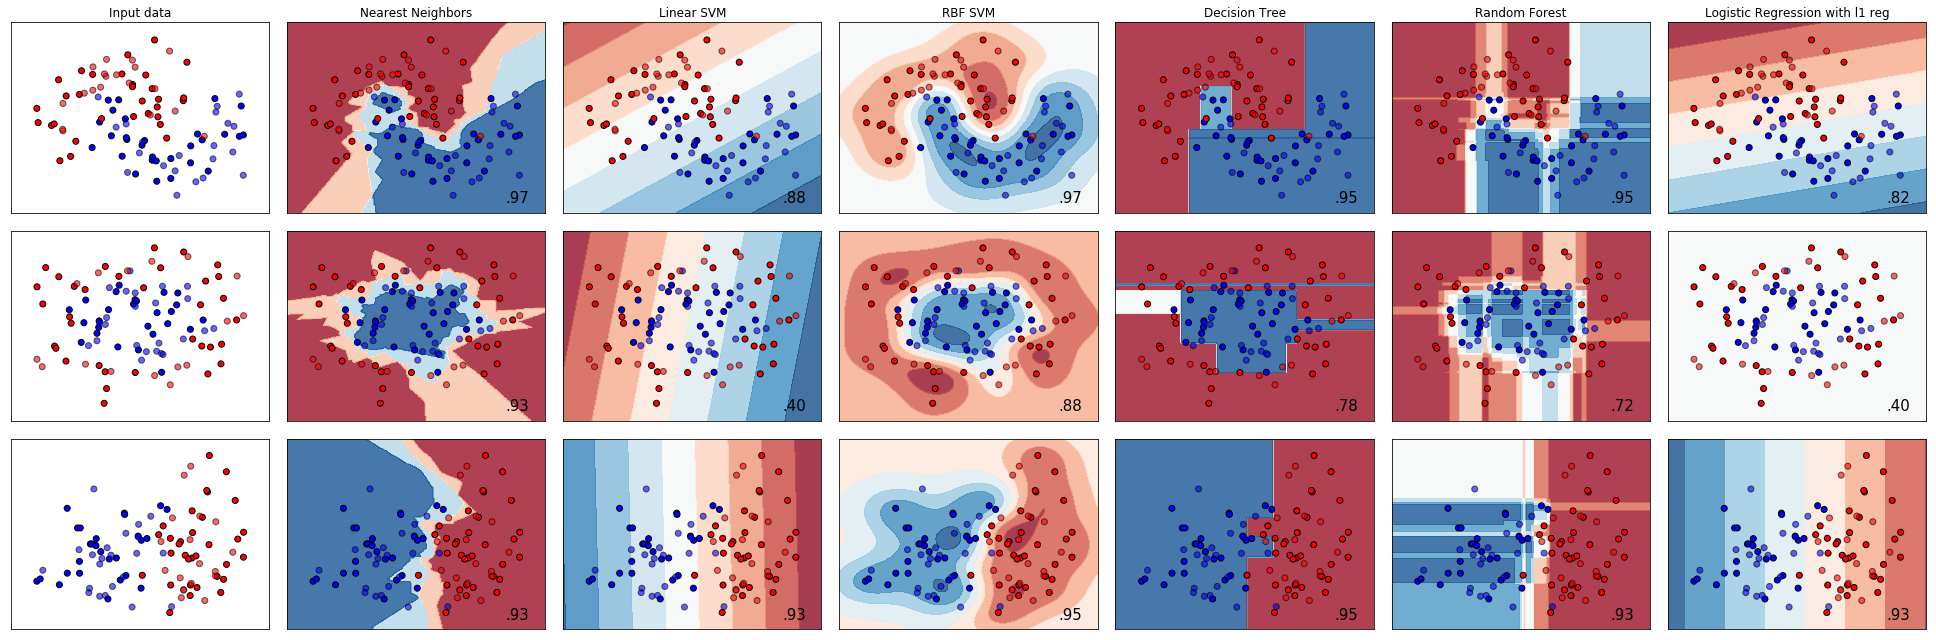

In [47]:
figure = plt.figure(figsize=(27, 9))
i = 1
h = .02  # step size in the mesh
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    print("\ndataset: ".format(["make_moons", "make_circles", "linearly_separable"]))

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(" {0}: {1}".format(name, score))

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## other practice

In [48]:
# read data
file_name = "data/kc_house_data.csv"
df=pd.read_csv(file_name)

# drop "id", "Unnamed: 0"
df.drop(columns=["id", "Unnamed: 0"], inplace=True)

# fill nan
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
# change price to label
df["price"] = round(df["price"]/100000)

In [50]:
# data scale and split
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features ]
Y = df['price']

X = StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    
    print("{0}: {1}".format(name, score))

Nearest Neighbors: 0.3892658852560148
Linear SVM: 0.36273904996915485
RBF SVM: 0.42227020357803824
Decision Tree: 0.41548426896977175
Random Forest: 0.364589759407773


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression with l1 reg: 0.33312769895126465
